In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import decomposition
from matplotlib import pyplot as plt
from sklearn import neighbors

from double_CV_builder import DCV

In [2]:
# imports the data
data = pd.read_csv("../raw_data/train_call.txt", index_col=0, delimiter="\t").transpose()
topInfo = data.iloc[:3]
data = data.iloc[4:].dropna(axis=1)
classes = pd.read_csv("../raw_data/train_clinical.txt", delimiter="\t", index_col=0)
data = classes.join(data).set_index("Subgroup").dropna()
# Add 1 to data because of chi-square feature selection


DCV.outer_repeats = 5
DCV.inner_repeats = 10
DCV.num_features = 150

model = neighbors.KNeighborsClassifier(n_jobs=-1)
modeller = DCV(model)
# prints all the params you can change :)
print(model.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [3]:
# select which params you want to test with the inner loop
# space is the paramater space
modeller.hyperParams['n_neighbors'] = range(3,15,2)
#modeller.hyperParams['l1_ratio'] = [0.1, 0.3, 0.5, 0.7, 0.9]


modeller.hyperParams

{'n_neighbors': range(3, 15, 2)}

In [4]:
# this does everything for you :)
# first is the data used, seconds comes the classifications and than with loop the amount of loops you want to do

modeller.train_fit(data=data, classes=data.index, loop=10)
# some test code

print(accuracy_score(DCV.__class_cleaner__(None, data.index),modeller.predict(data)))

(99, 1352)
accuracy: 0.45; precision:0.45; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
accuracy: 0.55; precision:0.55; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
accuracy: 0.45; precision:0.45; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=7)
accuracy: 0.8; precision:0.8; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
accuracy: 0.4; precision:0.4; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=7)
accuracy: 0.45; precision:0.45; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
accuracy: 0.55; precision:0.55; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
accuracy: 0.45; precision:0.45; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=7)
accuracy: 0.8; precision:0.8; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
accuracy: 0.4; precision:0.4; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=7)
accuracy: 0.45; precision:0.45; model:KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
accuracy: 0.55; precision:0.55; model:KNeighborsClassifier(n_j

In [5]:
modeller.get_best_features()

[array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False])]

In [6]:
print(topInfo.transpose().iloc[:-1].loc[modeller.get_best_features()[0]])

                  Start          End  Nclone
Chromosome                                  
1            30716764.0   30984527.0    19.0
1            31136968.0   31957740.0    91.0
1            72489681.0   72620747.0     5.0
1           149369522.0  149394958.0     5.0
2            61025070.0   61061211.0     5.0
...                 ...          ...     ...
8            41575958.0   42118548.0    55.0
8            42123757.0   42175380.0     9.0
8            48952907.0   49214104.0    27.0
8            49291873.0   50106229.0    46.0
8            50133866.0   50469104.0    16.0

[150 rows x 3 columns]


In [28]:
modeller.test_accuracy

,0
n_neighbors,
3,0.6875
5,0.7375
7,0.7375
9,0.7625
11,0.7250
...,...
5,0.6000
7,0.6250
9,0.6250


In [7]:
modeller.test_precision

In [ ]:
modeller.test_recall


(99, 1352)


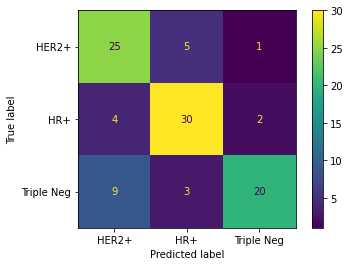

In [8]:
cm = confusion_matrix(data.index, modeller.predict(data))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=modeller.get_best_model().classes_)
disp.plot()

In [10]:
modeller.get_best_model()

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [9]:
import scipy.stats as stats
model.predict_proba(data,)
stats.wilcoxon(modeller.get_best_model.predict_proba(data), data.index)

AttributeError: 'function' object has no attribute 'predict_proba'

In [ ]:
print(modeller.get_best_features())

#todo
box plots accuracy, precision, recall
best model. and params features

save all the juicy info (params, and features)

In [ ]:
modeller.all_accuracies
#modeller.all_precision
#modeller.all_recall